Mapping of target variable to encoded values:
discarded: 0
question: 1
section: 2
subsection: 3
          css_pk  customer_pk  is_italic  is_bold  html_pk  \
4273702  5169608         2999          0        0  5169609   
3403714  4886431         2131          0        0  4886432   
262225   3766693          950          0        1  3766696   
773807   4205830          910          0        0  4205833   
715164   5233069         1590          0        0  5233071   

                              id  is_underline     target  form_rel_depth  \
4273702  384942|5169609|69D269D9             0  discarded               2   
3403714  360312|4886432|21820517             0   question               1   
262225   262953|3766696|5DFA3986             0   question               2   
773807   301521|4205833|494FE199             0   question               4   
715164    390851|5233071|para_36             0  discarded               2   

         form_rel_font_size  ...  para_foll_depth_ind_1  \
4273702  

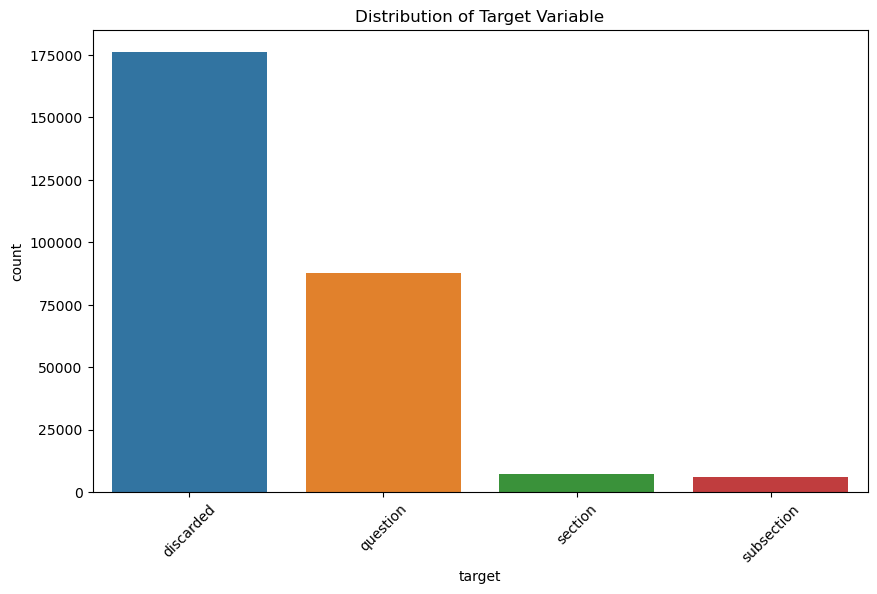

Top 21 correlations with the target variable:
lang_ls_qm                                        0.262512
style_heading                                     0.174132
lang_pct_possessive_pronoun                       0.122238
lang_pct_wh_pronoun                               0.120659
lang_pct_wh_abverb                                0.109975
form_font_family_mode_ind                         0.097201
style_q                                           0.094781
lang_pct_coordinating_conjunction                 0.094567
lang_pct_verb_base_form                           0.093125
style_list_num                                    0.091204
lang_pct_verb_3rd_person_sing_present             0.082678
lang_pct_verb_sing_present_non_third_person       0.079287
lang_pct_personal_pronoun                         0.075016
lang_pct_noun_plural                              0.063286
lang_mean_words_per_sent                          0.058535
lang_pct_preposition_subordinating_conjunction    0.052859
lang_pct_e

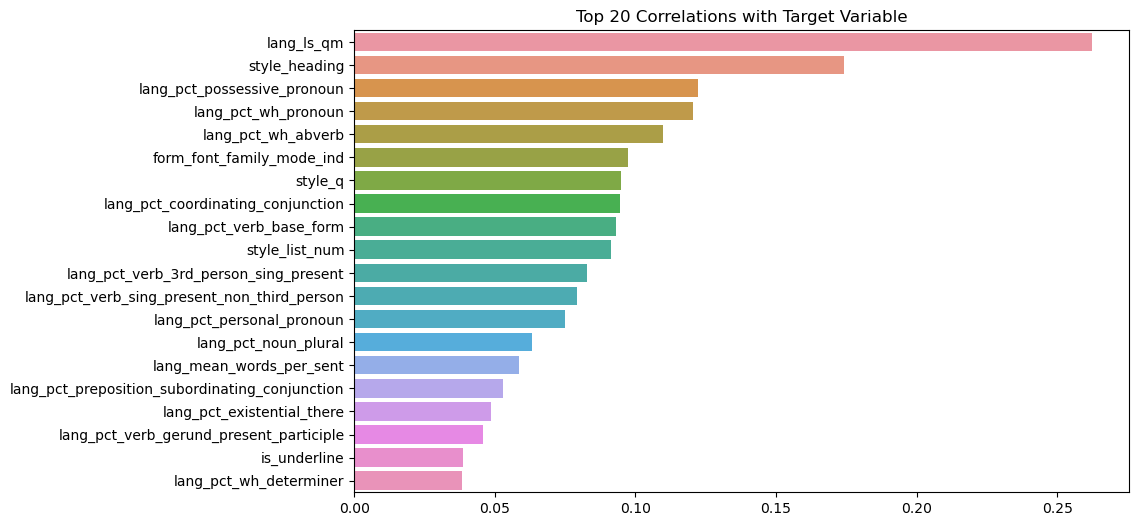

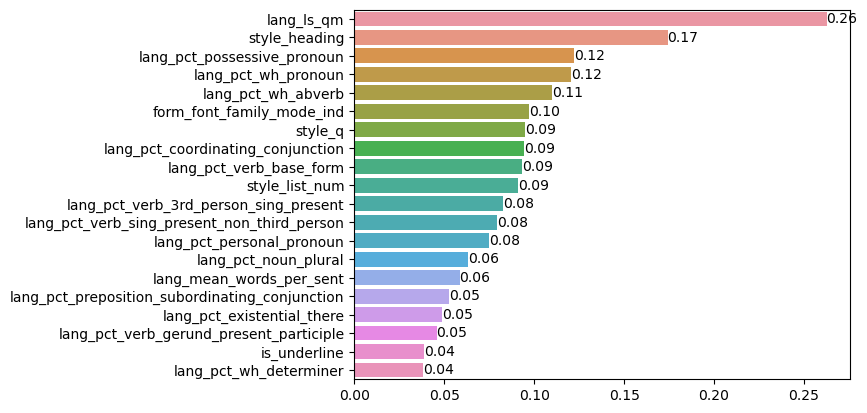

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'GT_IPI.parquet'
df = pd.read_parquet(file_path)

# Take a sample of the dataset (e.g., 10% of the data)
df_sample = df.sample(frac=0.05, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
df_sample['target_encoded'] = label_encoder.fit_transform(df_sample['target'])

# Get the mapping of classes to their encoded values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of target variable to encoded values:")
for k, v in mapping.items():
    print(f"{k}: {v}")

categorical_cols = ['begins_with', 'para_foll_depth_ind', 'para_foll_size_ind', 'para_prec_depth_ind', 'para_prec_size_ind']
df_sample = pd.get_dummies(df_sample, columns=categorical_cols,prefix=categorical_cols)


# Display the first few rows
print(df_sample.head())

# Summarize the dataset
print(df_sample.info())
print(df_sample.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df_sample)
plt.title('Distribution of Target Variable')
plt.xticks(rotation=45)
plt.show()

# Select only numeric columns for correlation calculation
numeric_df = df_sample.select_dtypes(include=[float, int])

# Calculate correlations with the target variable
correlation_matrix = numeric_df.corr()
correlation_with_target = correlation_matrix['target_encoded'].sort_values(ascending=False)

# Display the top 20 correlations
top_21_correlations = correlation_with_target.iloc[1:21]

print("Top 21 correlations with the target variable:")
print(top_21_correlations)

# Visualize the top 10 correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_21_correlations.values, y=top_21_correlations.index)
plt.title('Top 20 Correlations with Target Variable')
plt.show()
ax = sns.barplot(x=top_21_correlations.values, y=top_21_correlations.index)

# Annotate each bar with the correlation value
for i, (value, name) in enumerate(zip(top_21_correlations.values, top_21_correlations.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()
